In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_val = pd.read_csv('data/validation.csv')

## Feature Engineering

In [5]:
def encode_days(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.weekday,prefix='day')],axis=1)
    dataframe = dataframe.drop('weekday',axis=1)
    return dataframe

In [6]:
def encode_hours(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.hour,prefix='hour')],axis=1)
    dataframe = dataframe.drop('hour',axis=1)
    
    return dataframe

In [7]:
def encode_region(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.region,prefix='region')],axis=1)
    dataframe = dataframe.drop('region',axis=1)
    return dataframe

In [8]:
def encode_adexchange(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.adexchange,prefix='adexchange')],axis=1)
    dataframe = dataframe.drop('adexchange',axis=1)
    return dataframe

In [9]:
def encode_slotwidth(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotwidth,prefix='slotwidth')],axis=1)
    dataframe = dataframe.drop('slotwidth',axis=1)
    return dataframe

In [10]:
def encode_slotheight(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotheight,prefix='slotheight')],axis=1)
    dataframe = dataframe.drop('slotheight',axis=1)
    return dataframe

In [11]:
def encode_advertiser(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.advertiser,prefix='advertiser')],axis=1)
    dataframe = dataframe.drop('advertiser',axis=1)
    return dataframe

In [12]:
def encode_slotvisibility(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotvisibility,prefix='slotvisibility')],axis=1)
    dataframe = dataframe.drop('slotvisibility',axis=1)
    return dataframe

In [13]:
def encode_slotformat(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotformat,prefix='slotformat')],axis=1)
    dataframe = dataframe.drop('slotformat',axis=1)
    return dataframe

In [14]:
def encode_os_browser(dataframe):
    df_temp = pd.DataFrame(dataframe.useragent.str.split('_',1).tolist(), columns = ['OS','browser'])
    dataframe = pd.concat([dataframe,df_temp],axis=1)
    dataframe = dataframe.drop('useragent',axis=1)
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.OS,prefix='OS')],axis=1)
    dataframe = dataframe.drop('OS',axis=1)
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.browser,prefix='browser')],axis=1)
    dataframe = dataframe.drop('browser',axis=1)
    return dataframe

In [15]:
# 12. Encode slotprice into 5 ranges
def encode_slotprice(dataframe):
    slotprice_range = pd.DataFrame()
    slotprice_range['slotprices'] = pd.cut(dataframe.slotprice.values,5, labels=[1,2,3,4,5])
    dataframe = pd.concat([dataframe,slotprice_range],axis=1)
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotprices,prefix='slotprice')],axis=1)
    dataframe = dataframe.drop('slotprice',axis=1)
    dataframe = dataframe.drop('slotprices',axis=1)
    return dataframe

In [16]:
def encode_usertags(dataframe):
    usertags = list(dataframe.usertag)
    unique_users = set()
    list_users = []
    for user in usertags:
        u = user.split(',')
        list_users.append(u)
        for us in u:
            unique_users.add(us)
    users = pd.DataFrame()
    for user in unique_users:
        users["user_"+user] = 0
    dataframe = pd.concat([dataframe,users],axis=1)
    for user in unique_users:
        datas = []
        for users in list_users:
            if user in users:
                datas.append(1)
            else:
                datas.append(0)
        dataframe["user_"+user] = datas
    dataframe = dataframe.drop('usertag',axis=1)
    return dataframe

In [17]:
xtrain = df_train.drop(['click','bidid','logtype','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
ytrain = df_train.click

xval = df_val.drop(['click','bidid','logtype','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
yval = df_val.click


xtest = df_test.drop(['bidid','logtype','userid','IP','city','domain', 'url','urlid','slotid','creative','keypage'], axis=1)

In [18]:
xtrain = encode_adexchange(xtrain)
xtrain = encode_advertiser(xtrain)
xtrain = encode_days(xtrain)
xtrain = encode_hours(xtrain)
xtrain = encode_os_browser(xtrain)
xtrain = encode_region(xtrain)
xtrain = encode_slotformat(xtrain)
xtrain = encode_slotheight(xtrain)
xtrain = encode_slotprice(xtrain)
xtrain = encode_slotvisibility(xtrain)
xtrain = encode_slotwidth(xtrain)
xtrain = encode_usertags(xtrain)
xtrain.head()

,adexchange_1,adexchange_2,adexchange_3,adexchange_4,adexchange_null,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,...,user_10131,user_10031,user_10133,user_10142,user_10077,user_10130,user_10024,user_10126,user_10111,user_10684
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [19]:
xval = encode_adexchange(xval)
xval = encode_advertiser(xval)
xval = encode_days(xval)
xval = encode_hours(xval)
xval = encode_os_browser(xval)
xval = encode_region(xval)
xval = encode_slotformat(xval)
xval = encode_slotheight(xval)
xval = encode_slotprice(xval)
xval = encode_slotvisibility(xval)
xval = encode_slotwidth(xval)
xval = encode_usertags(xval)
xval.head()

,adexchange_1,adexchange_2,adexchange_3,adexchange_4,adexchange_null,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,...,user_10131,user_10031,user_10133,user_10130,user_10077,user_10142,user_10024,user_10126,user_10111,user_10684
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
xtest = encode_adexchange(xtest)
xtest = encode_advertiser(xtest)
xtest = encode_days(xtest)
xtest = encode_hours(xtest)
xtest = encode_os_browser(xtest)
xtest = encode_region(xtest)
xtest = encode_slotformat(xtest)
xtest = encode_slotheight(xtest)
xtest = encode_slotprice(xtest)
xtest = encode_slotvisibility(xtest)
xtest = encode_slotwidth(xtest)
xtest = encode_usertags(xtest)
xtest.head()

,adexchange_1,adexchange_2,adexchange_3,adexchange_4,adexchange_null,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,...,user_10142,user_10031,user_10133,user_10130,user_10077,user_10126,user_10024,user_10131,user_10111,user_10684
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## PCTR prediction using Random Forest Classifier

In [21]:
#run on validation set
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier(n_jobs = -1, n_estimators = 300, random_state =100, max_features = "auto", min_samples_leaf = 50, class_weight = "balanced")

In [23]:
resultval = model.fit(xtrain, ytrain).predict(xval)

In [24]:
#run on test set
resulttest = model.fit(xtrain, ytrain).predict(xtest)

In [25]:
predprob = model.predict_proba(xval)

pCTRval = pd.DataFrame(predprob)
pCTRval.head()

,0,1
0,0.977295,0.022705
1,0.174875,0.825125
2,0.832169,0.167831
3,0.923153,0.076847
4,0.839829,0.160171


In [26]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(df_val.click, pCTRval[1])
metrics.auc(fpr, tpr)

0.85408666298588798

In [27]:
predprob = model.predict_proba(xtest)

pCTRtest = pd.DataFrame(predprob)
pCTRtest.head()

,0,1
0,0.754489,0.245511
1,0.957192,0.042808
2,0.996521,0.003479
3,0.979481,0.020519
4,0.969188,0.030812


In [28]:
pctrval = []
pctrtest = []

for pctr in pCTRval[1]:
    pctrval.append( pctr / 1000)

for pctr in pCTRtest[1]:
    pctrtest.append( pctr / 1000 )

In [29]:
pctrval = pd.DataFrame(pctrval)
pctrval.to_csv('pCTRval.csv')
pctrval.head()

,0
0,0.000023
1,0.000825
2,0.000168
3,0.000077
4,0.000160


In [30]:
pctrtest = pd.DataFrame(pctrtest)
pctrtest.to_csv('pCTRtest.csv')
pctrtest.head()

,0
0,0.000246
1,0.000043
2,0.000003
3,0.000021
4,0.000031


In [31]:
fpr, tpr, thresholds = metrics.roc_curve(df_val.click, pctrval)
metrics.auc(fpr, tpr)

0.85408666298588798

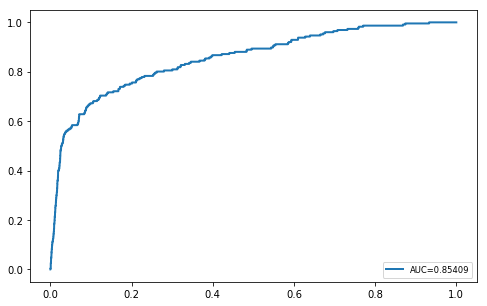

In [32]:
f, axes = plt.subplots(1, figsize=(8, 5))
lab = 'AUC=%.5f' % metrics.auc(fpr, tpr)
axes.step(fpr, tpr, lw=2,label=lab)
axes.legend(loc='lower right', fontsize='small')
plt.show()

## Linear Bidding 

In [33]:
pctrval = pd.read_csv('pCTRval.csv')
average_ctr = df_val.click.sum() / df_val.bidid.count()
pctrval_list = list(pctrval['0'])

In [34]:
def linear_bidding(pctrval_list):
    bids = []
    max_bid = 300
    for bid in range(10, max_bid+10, 10):
        for pctr in pctrval_list:
            bids.append(bid * pctr / average_ctr)

    bid_groups = [bids[x:x+len(pctrval)] for x in range(0, len(bids), len(pctrval))]
    return bid_groups

In [35]:
df_data = pd.DataFrame(columns=['bid','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'bid':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}
bid_groups = linear_bidding(pctrval_list)

maxi = 0
maxv = -1
for group in range(0,len(bid_groups)):
    budget = 6250000.0
    imps = 0
    clicks = 0
    spent = 0
    bid = bid_groups[group]
    check = bid >= df_val.payprice
    for i in range(0,len(check)):
        payprice = df_val.payprice[i]
        if budget < payprice:
            break
        if check[i]:
            imps = imps + 1
            clicks = clicks + df_val.click[i]
            budget = budget - payprice
            spent = spent + payprice
    spent = spent / 1000
    ctr = ((clicks / imps) * 100)
    cpm = ((spent / imps) * 1000)
    cpc = (spent / clicks)
    if ctr * clicks > maxv:
        maxv = ctr * clicks
        maxi = group
    lists['bid'] = range(10, 310, 10)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)

In [36]:
df_data.bid = lists['bid']
df_data.clicks = lists['clicks']
df_data.imps = lists['imps']
df_data.spent = lists['spent']
df_data.CTR = lists['ctr']
df_data.CPC = lists['cpc']
df_data.CPM = lists['cpm']
df_data

,bid,clicks,imps,spent,CTR,CPC,CPM
0,10,8,1153,6.022,0.693842,0.752750,5.222897
1,20,10,2279,16.642,0.438789,1.664200,7.302326
2,30,11,3736,37.107,0.294433,3.373364,9.932281
3,40,12,5458,65.422,0.219861,5.451833,11.986442
4,50,18,7134,96.434,0.252313,5.357444,13.517522
5,60,21,8936,132.048,0.235004,6.288000,14.777081
6,70,28,10797,169.314,0.259331,6.046929,15.681578
7,80,37,12716,211.488,0.290972,5.715892,16.631645
8,90,48,14629,257.872,0.328115,5.372333,17.627452
9,100,54,16576,310.947,0.325772,5.758278,18.758868


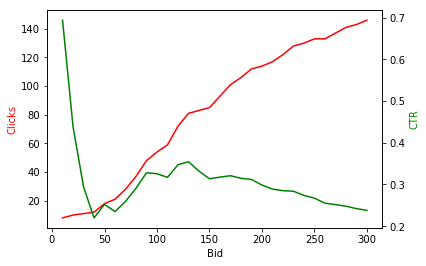

In [37]:
first_line = df_data[['clicks','bid']].astype(float)
second_line = df_data[['bid','CTR']].astype(float)

fig, ax1 = plt.subplots()
ax1.plot(first_line.bid,first_line.clicks, color='r')
ax1.set_xlabel('Bid')
ax1.set_ylabel('Clicks', color='r')

ax2 = ax1.twinx()
ax2.plot(second_line.bid, second_line.CTR, color='g')
ax2.set_ylabel('CTR', color='g')
fig.savefig('linear.png', dpi=100)
plt.show()

In [38]:
df_data.iloc[np.where(df_data.clicks == df_data.clicks.max())[0]]

,bid,clicks,imps,spent,CTR,CPC,CPM
29,300,146,61336,2355.117,0.238033,16.130938,38.396977
